# Method comparison

Comparison between the detections in the original images and the processed by Deeplav3 + OpenCV post-processing

## Path definitions

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ORIGINAL_RESULTS = "/content/drive/MyDrive/TFM/comparison_files/original_predictions.csv"
CROP_RESULTS = "/content/drive/MyDrive/TFM/comparison_files/crop90_predictions.csv"

## Read predictions


In [8]:
import pandas as pd
import ntpath
import os
import matplotlib.pyplot as plt

In [9]:
original_df = pd.read_csv(ORIGINAL_RESULTS)
crop_df = pd.read_csv(CROP_RESULTS)

In [10]:
original_df.describe()

,Unnamed: 0,x_min,y_min,x_max,y_max,score
count,5710.00000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,2854.50000,1054.063748,502.898774,1112.005604,550.593345,93.456567
std,1648.47935,371.604176,168.265796,372.436477,174.190461,8.183659
min,0.00000,-32.000000,0.000000,16.000000,16.000000,70.000000
25%,1427.25000,832.000000,400.000000,896.000000,448.000000,90.000000
50%,2854.50000,1088.000000,464.000000,1152.000000,528.000000,98.000000
75%,4281.75000,1280.000000,608.000000,1344.000000,640.000000,99.000000
max,5709.00000,1888.000000,1040.000000,1920.000000,1072.000000,99.000000


In [11]:
crop_df.describe()

,Unnamed: 0,x_min,y_min,x_max,y_max,score
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1103.500000,69.594203,204.108696,137.086957,259.543478,95.355525
std,637.539018,57.536893,127.698057,67.666442,135.397777,6.857865
min,0.000000,-16.000000,0.000000,16.000000,16.000000,70.000000
25%,551.750000,32.000000,128.000000,96.000000,176.000000,95.000000
50%,1103.500000,48.000000,176.000000,128.000000,224.000000,99.000000
75%,1655.250000,96.000000,240.000000,176.000000,304.000000,99.000000
max,2207.000000,416.000000,896.000000,448.000000,944.000000,99.000000


## Perform further analysis

In [12]:
def get_original(crop_name):
  folder = f'{crop_name.split("_")[1]}_{crop_name.split("_")[2]}'
  return original_df[original_df['name'] == folder]

In [13]:
def get_from_original(image_name):
  return crop_df[crop_df['name'].str.endswith(image_name)]

In [14]:
original_df['name'] = original_df['name'].apply(lambda x: ntpath.basename(x))
crop_df['name'] = crop_df['name'].apply(lambda x: ntpath.basename(x))

In [15]:
original_df.drop('Unnamed: 0', inplace=True, axis=1)

In [16]:
crop_df.drop('Unnamed: 0', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


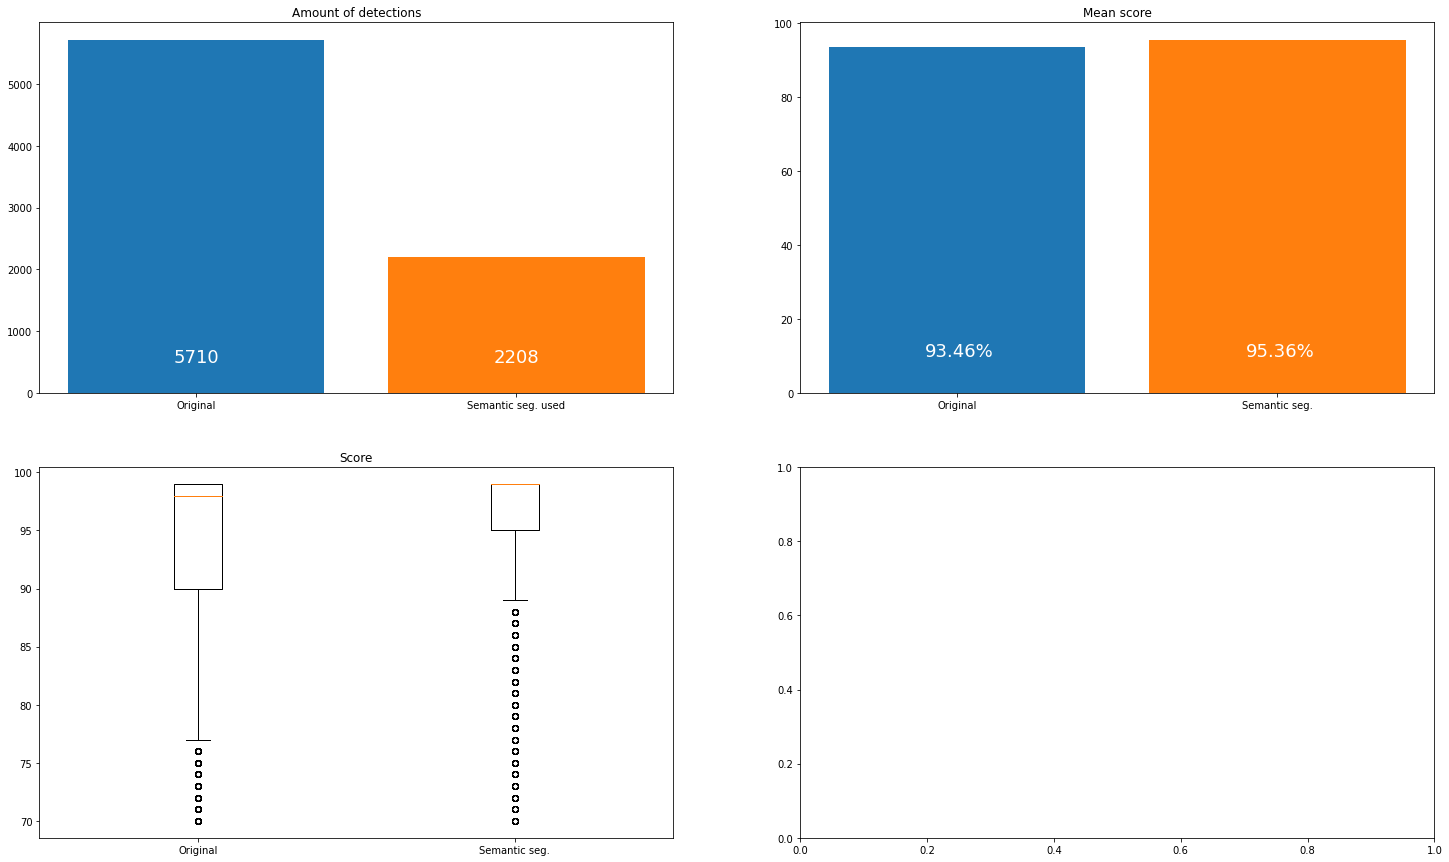

In [67]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(25, 15)

# Amount of images

indexes = [0, 1]
heights = [len(original_df.index), len(crop_df.index)]
labels = ['Original', 'Semantic seg. used']

axs[0, 0].bar(indexes[0], heights[0])
axs[0, 0].bar(indexes[1], heights[1])

axs[0, 0].set_title('Amount of detections')
axs[0, 0].set_xticks(indexes)
axs[0, 0].set_xticklabels(labels)

for i, v in enumerate(labels):
  axs[0, 0].text(-0.07 + i, 500, heights[i], fontsize=18, color=(1,1,1,1))

# Mean Score

heights = [original_df['score'].mean(), crop_df['score'].mean()]
labels = ['Original', 'Semantic seg.']

axs[0, 1].bar(indexes[0], heights[0])
axs[0, 1].bar(indexes[1], heights[1])

axs[0, 1].set_title('Mean score')
axs[0, 1].set_xticks(indexes)
axs[0, 1].set_xticklabels(labels)

for i, v in enumerate(labels):
  axs[0, 1].text(-0.1 + i, 10, f'{round(heights[i], 2)}%', fontsize=18, color=(1,1,1,1))


# Boxplot scores

heights = [original_df['score'].to_numpy(), crop_df['score'].to_numpy()]
labels = ['Original', 'Semantic seg.']

axs[1, 0].boxplot([heights[0], heights[1]])

axs[1, 0].set_title('Score')
axs[1, 0].set_xticklabels(labels)

plt.show()